# Exploratory Data Analysis

The purpose of this section of the notebook is to provide some key highlights of the baseline data being used. This showcases the various attributes, any specific transformations, and key relationships.

In [62]:
# Import the relevant libraries, and load the dataset
import pandas as pd
import seaborn as sns
import math

# Plotting
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
# morancolor=sns.color_palette(['#66260b', '#cb8034', '#ddc08d', '#9c886f', '#47261a','#363634', '#524636', '#ac7330', '#b19a78', '#d1c5ab'])
# sns.set_theme(style="whitegrid")#, palette=morancolor)
# plt.rcParams['font.family']='serif'
# plt.rcParams['figure.dpi'] =100 # high resolution

df = pd.read_csv('./../datasets/original/WA_Fn-UseC_-Telco-Customer-Churn.csv')

As can be seen below, the dataset contains 21 columns and 7,043 rows

In [63]:
df.shape

(7043, 21)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Attribute Definitions
- **customerID** is the unique identifier per customer.
- **MonthlyCharges** and **TotalCharges** identify the monthly and total spending to date for the population. Both should be float attributes.
- **tenure** is how long the customer has been with the service, measured in months.
- All other 16 attributes are categorical and highlight customer attributes (e.g. Senior Citizen) or usage of various features or (e.g. Phone Service).

In [65]:
df.sample(n=5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4592,1897-RCFUM,Female,0,Yes,Yes,39,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,24.20,914.6,No
1128,0098-BOWSO,Male,0,No,No,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.40,529.8,No
704,1456-TWCGB,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,49.25,208.45,No
6420,1422-DGUBX,Male,0,Yes,No,32,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,One year,Yes,Electronic check,79.25,2619.15,No
5440,4456-RHSNB,Female,0,Yes,Yes,19,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),49.60,962.9,No


## Number of customers with churn

No     5174
Yes    1869
Name: Churn, dtype: int64

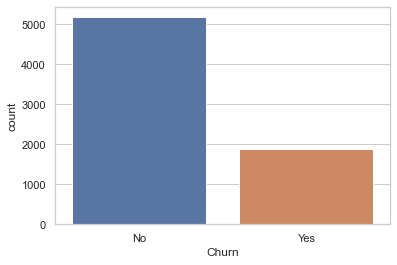

In [66]:
sns.countplot(x = "Churn", data = df)
df.loc[:, 'Churn'].value_counts()

## Basic Transformations

Converting **Total Charges** to a float attribute.

In [37]:
df['TotalCharges'] = df['TotalCharges'].str.replace(r' ','0').astype(float)
df['TotalCharges'].dtypes

dtype('float64')

- Changing **Churn** to better represent a binary attribute with 1s and 0s vs. "No" or "Yes". This aids further computation.
- Changing **Senior Citizen** to a categorical attribute (No/Yes) from 1s and 0s.

In [39]:
df['Churn'] = df['Churn'].apply(lambda x: 0 if x == "No" else 1)
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: "No" if x == 0 else "Yes")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### (Pending) Highlight the counts by various attributes

### (Pending) Highlight the relationship between churn and the various attributes

We have 17 categorical features


TypeError: Neither the `x` nor `y` variable appears to be numeric.

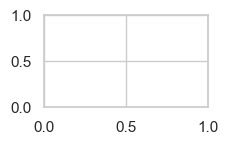

In [51]:
def barall(df,lst,target,h=4,w=15,cut=3,hspace=.5,wspace=.25,rotatelst=[],rotation=20,xticksize=10,titlesize=11,yticksize=10):
    f=plt.figure(figsize=(w,h))
    plt.subplots_adjust(hspace=hspace,wspace=wspace)
    for i,col in enumerate(lst):
        f.add_subplot(math.ceil(len(lst)/cut),cut,i+1)
        sns.barplot(data=df,x=col,y=target)
        if col in rotatelst: plt.xticks(rotation=rotation)
        plt.xticks(fontsize=xticksize)
        plt.yticks(fontsize=yticksize)
        plt.xlabel('')
        plt.title(col,fontweight='bold',fontsize=titlesize)
        plt.ylabel('')
        despine()
        
catcol=df.select_dtypes("O").nunique().sort_values(ascending=False)[1:].index.tolist()
print(f"We have {len(catcol)} categorical features")

barall(df,catcol,'Churn',w=10,h=11,cut=4,
       rotatelst=['PaymentMethod','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                 'Contract','StreamingTV','StreamingMovies'],
       xticksize=8,rotation=27,hspace=1)

# Accredition: https://www.kaggle.com/muladpham/telco-customer-churn-moranfinan

### (Pending) Highlight the distribution of total charges and relationship with tenure

### (Pending) Highlight the distribution of monthly charges and how this changes by various attributes

### (Pending) Highlight the relationship between churn and tenure (survivorship bias)

### (Pending) Feature Importance